In [1]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
# ImageDataGenerator (p308)
# horizontal_flip=True  =>수평 대칭 이미지를 50%확률로 만들어 추가합니다
# width_shift_range=0.1 , height_shift_range=0.1 > 전체 크기 15% 범위에서 좌우로 이동합니다.
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('./deep-learning/data/train', target_size=(150, 150), batch_size=5, class_mode='binary')
test_generator = test_datagen.flow_from_directory('./deep-learning/data/test', target_size=(150, 150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
# 모델 선언
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Dense로 집어넣기 위해 Flatten() 으로 펼침
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# 이진 분류니까 시그모이드
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

# (3x3x3) x (32) + 32 = 896  // 이미지 150 x150
# 이미지 148 x 148
# 32 x 4 x 32 + 32 = 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
# 모델 실행
history = model.fit(train_generator,epochs=100,
                   validation_data=test_generator,
                   callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 3s 61ms/step - loss: 0.7021 - accuracy: 0.4812 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 2s 54ms/step - loss: 0.6888 - accuracy: 0.4938 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 0.6849 - accuracy: 0.5312 - val_loss: 0.6803 - val_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.6901 - accuracy: 0.5188 - val_loss: 0.6738 - val_accuracy: 0.5417
Epoch 5/100
32/32 [==============================] - 2s 56ms/step - loss: 0.6657 - accuracy: 0.5938 - val_loss: 0.6626 - val_accuracy: 0.6833
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 0.6609 - accuracy: 0.6125 - val_loss: 0.6332 - val_accuracy: 0.5750
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.6238 - accuracy: 0.6562 - val_loss: 0.6043 - val_accuracy: 0.6000
Epoch 

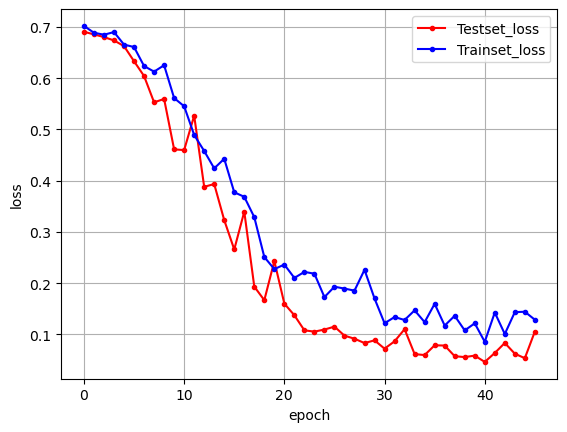

In [7]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()